Code to extract the frequency estimates from the no byzantine with varied white tiles test

In [64]:
import os
import random

import numpy as np
import pandas as pd
from jedi.api import file_name

# folder_names = ["experiment_test1"]
number_of_experiments = 10
number_of_robots = 20
#In this context, an experiment refers to a set of 10 (subject to change) runs of the simulation with that config

harm_df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine_0.75/no_byzantine75.csv")

# harm_diff = harm_df.median() #putting loads of shit on the end for some reason
harm_diff = 1.780535

print(harm_df)
print(harm_diff)


def get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        estimate_list = []
        path_to_data = experiment_name + folder_name + "/"
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"

            df = pd.read_csv(path_to_robot, sep=" ")
            if "Estimate" in df.columns:
                #Need to filp it, have the actual percentages as the col names
                last_estimate = df["Estimate"].iloc[-1]
                difference = 100 * (abs(last_estimate - 0.75))
                estimate_list.append(difference)

                # new_row = pd.DataFrame([[folder_name, last_estimate]], columns=estimate_df.columns)
                # estimate_df = pd.concat([estimate_df, new_row], ignore_index=True)
        estimate_df[folder_name] = estimate_list

    print(os.getcwd())
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

folder_names = ["1","2","3","4","5","6","7","8"]
# folder_names = ["1"]


get_estimates_from_experiment(folder_names, number_of_experiments, number_of_robots, "byzantine03Harm","collected_results/byzantine_random0.3/byzantine_random_")

          1
0  1.318000
1  2.088070
2  2.379649
3  3.918772
4  0.467895
5  1.473000
6  0.969500
7  2.928947
1.780535
/home/zak-22/arg/toychain-argos/HelloNeighbor/results
          1          2         3         4         5         6         7  \
0  5.834500   3.826296  2.813889  0.434778  4.188667  1.637000  0.832778   
1  2.341404   2.138667  2.974314  4.896111  0.084222  3.793000  5.296389   
2  1.039804   1.540000  2.321250  2.121500  0.591852  6.315823  6.608444   
3  0.263333  10.523588  0.567843  1.957292  5.859907  5.045882  3.118472   
4  1.019608   4.539412  0.655926  4.271284  2.795778  2.460667  0.242564   
5  0.035625   0.101167  1.728704  5.251556  2.326000  3.170185  1.085246   
6  1.481481   5.328000  0.015741  2.555778  2.673889  9.612500  5.216282   
7  4.422745   2.866296  0.087333  2.226667  1.384314  1.141042  2.263778   
8  2.450500   2.901667  0.817000  1.065147  1.541778  5.474103  2.389000   

           8  
0   8.599375  
1   2.006111  
2   7.608167  
3   4.44

Creating the box plots for the no byzantine data actual tile estimated

In [69]:
number_of_experiments = 10
number_of_robots = 20

folder_names = ["8","9","10","11","12","13","14","15","16","17","18","19"]

def get_byzantine_blocks(folder_names, number_of_experiments, number_of_robots, file_name, experiment_name):
    estimate_df = pd.DataFrame()
    for folder_name in folder_names:
        path_to_data = experiment_name + folder_name + "/"
        byzantine_blocks = []
        for i in range(1,number_of_experiments):
            folder_number = str(i).zfill(3)
            robot_picked = random.randint(1,number_of_robots)
            path_to_robot = path_to_data + folder_number + "/" + str(robot_picked) + "/" + "sc.csv"
            df = pd.read_csv(path_to_robot, sep=" ")
            if "Byzantine" in df.columns:
                for index, row in df.iterrows():
                    byzantine_blocks.append(row["Byzantine"])

        byzantine_fraction = sum(byzantine_blocks) / len(byzantine_blocks)
        estimate_df[folder_name] = [byzantine_fraction]
    print(estimate_df)
    estimate_df.to_csv(file_name + ".csv", index=False)

get_byzantine_blocks(folder_names,10,20,"byzantine_blocks","collected_results/vote_test/byzantine_")

     8    9   10       11        12        13        14       15        16  \
0  0.0  0.0  0.0  0.03125  0.151515  0.285714  0.666667  0.74359  0.742857   

         17    18        19  
0  0.742857  0.75  0.709677  


Actual percentage of white tiles vs estimate vary grid size

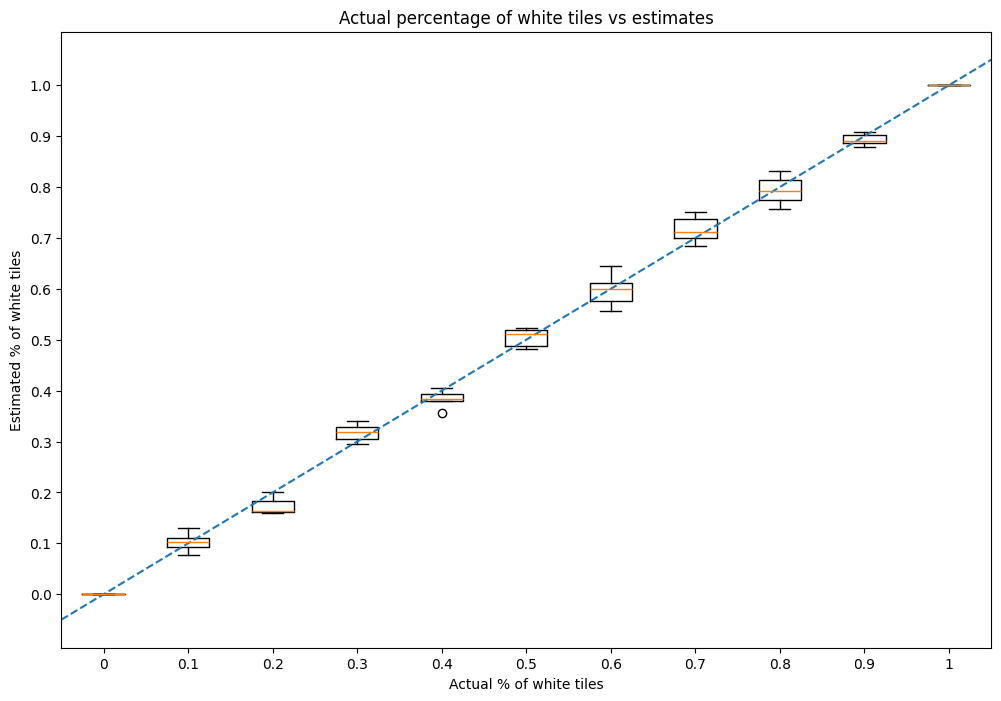

<Figure size 1200x800 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine/vary_tiles_no_byzantine.csv")

#df["AE"] = 100 * abs(df["Tile Percentage"] - df["Estimate"])
fig, ax = plt.subplots(figsize = (12,8))

plt.figure(figsize = (12,8))
actual_box = ax.boxplot([df[col] for col in df.columns],
            tick_labels = df.columns,
            patch_artist = False)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
ax.plot([x_min,x_max], [y_min,y_max], "--")

ax.set_yticks([x/10 for x in range(11)])


ax.set_title("Actual percentage of white tiles vs estimates")
ax.set_ylabel("Estimated % of white tiles")
ax.set_xlabel("Actual % of white tiles")

plt.tight_layout()
plt.savefig("ActualPercentageNoByzantine.png")
plt.show()


Creating the box plots for the no byzantine data AE

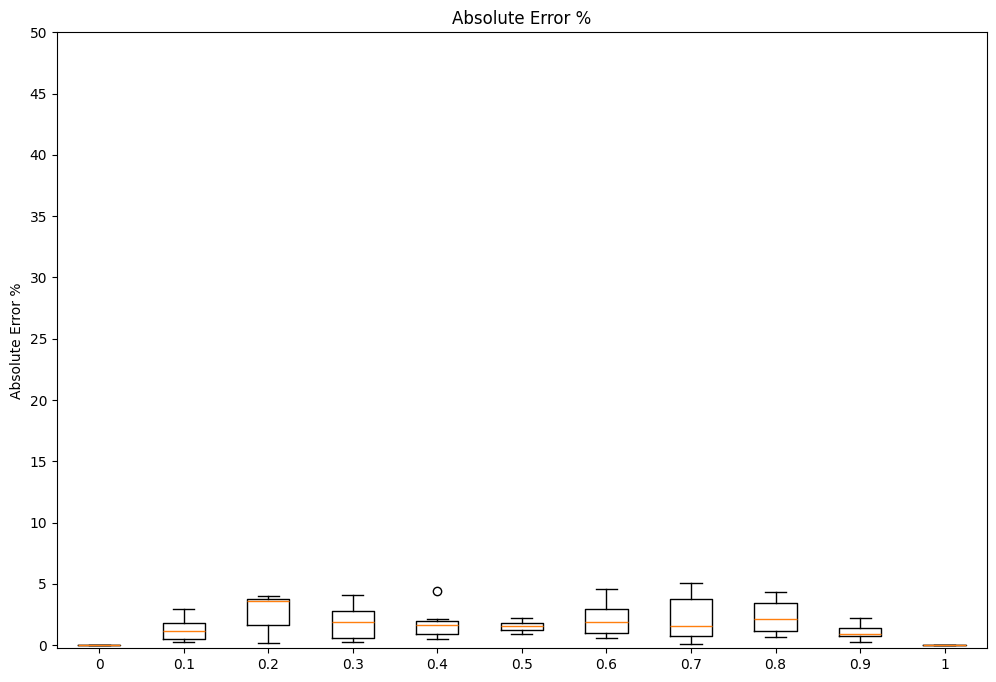

<Figure size 1200x800 with 0 Axes>

In [55]:
df = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/no_byzantine/vary_tiles_no_byzantine_AE.csv")

fig, ax = plt.subplots(figsize = (12,8))

plt.figure(figsize = (12,8))
AE_box = ax.boxplot([df[col] for col in df.columns],
            tick_labels = df.columns,
            patch_artist = False)

ax.set_yticks([x for x in range(51) if x % 5 ==0])

ax.set_title("Absolute Error %")
ax.set_ylabel("Absolute Error %")
plt.savefig("AENoByzantine.png")
plt.show()


Absolute error for byzantine robots from 0-8 robots,

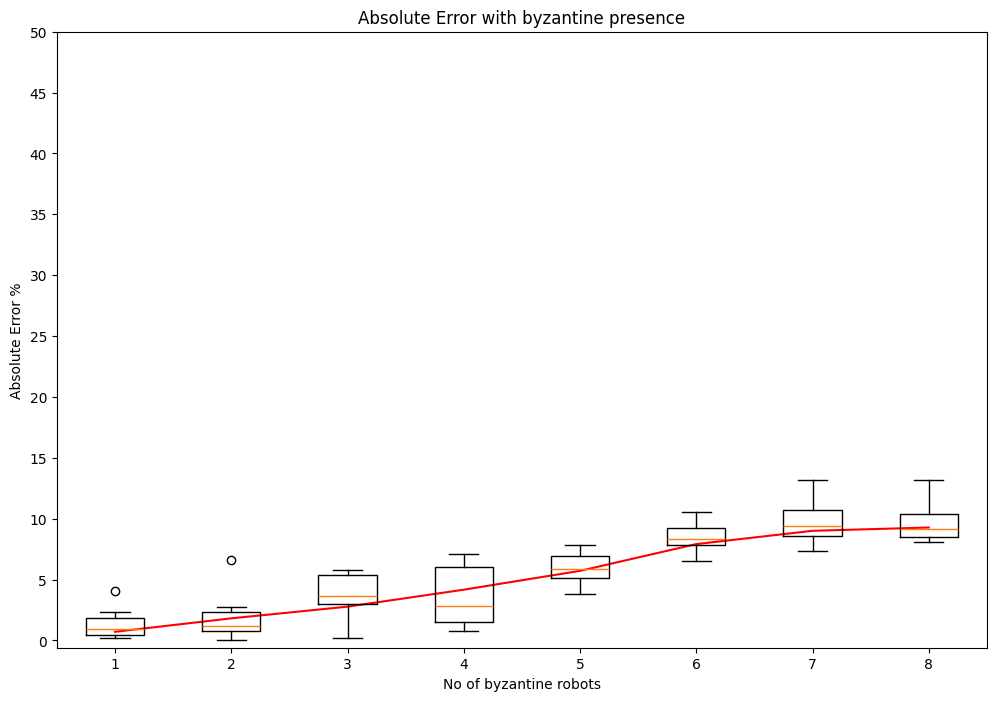

<Figure size 1200x800 with 0 Axes>

In [56]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_3 = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_threshold0.3/byzantine_0.3.csv")

x = np.arange(1, df_3.shape[1] + 1)
y = df_3.median()

smoothed = lowess(y, x, frac=0.6)

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(smoothed[:,0], smoothed[:,1], "r-")

plt.figure(figsize = (12,8))
AE_box = ax.boxplot([df_3[col] for col in df_3.columns],
            tick_labels = df_3.columns,
            patch_artist = False)

ax.set_yticks([x for x in range(51) if x % 5 ==0])

ax.set_title("Absolute Error with byzantine presence")
ax.set_ylabel("Absolute Error %")
ax.set_xlabel("No of byzantine robots")
plt.savefig("AEByzantine.png")
plt.show()

Harm plotted for byzantine, a bit of a pointless graph if you ask me but we ball

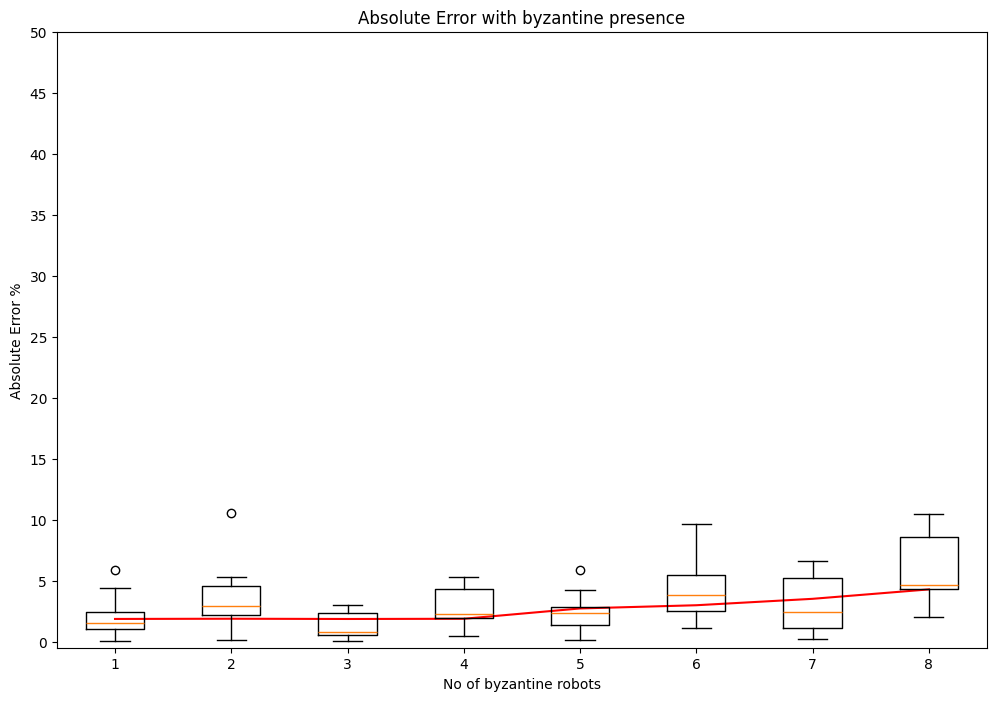

<Figure size 1200x800 with 0 Axes>

In [66]:
df_random = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_random0.3/byzantine03Random.csv")

x = np.arange(1, df_random.shape[1] + 1)
y = df_random.median()

smoothed = lowess(y, x, frac=0.6)

fig, ax = plt.subplots(figsize = (12,8))

ax.plot(smoothed[:,0], smoothed[:,1], "r-")

plt.figure(figsize = (12,8))
AE_box = ax.boxplot([df_random[col] for col in df_random.columns],
            tick_labels = df_random.columns,
            patch_artist = False)

ax.set_yticks([x for x in range(51) if x % 5 ==0])

ax.set_title("Absolute Error with byzantine random inputs")
ax.set_ylabel("Absolute Error %")
ax.set_xlabel("No of byzantine robots")
plt.savefig("AEByzantine.png")
plt.show()

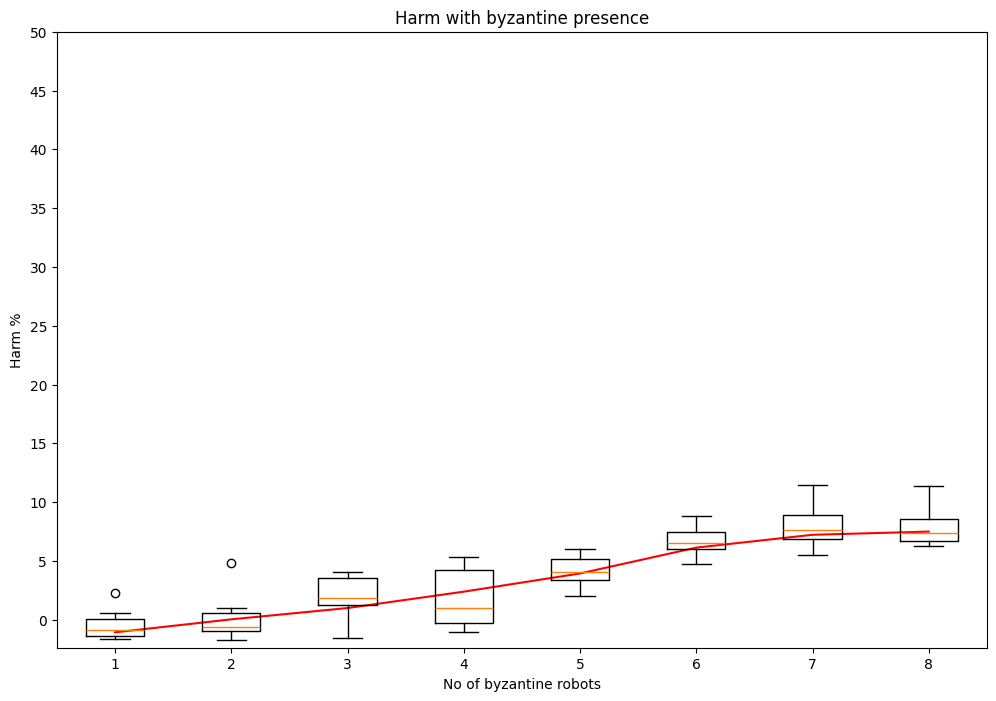

<Figure size 1200x800 with 0 Axes>

In [57]:
df_3_harm = pd.read_csv("/home/zak-22/arg/toychain-argos/HelloNeighbor/results/collected_results/byzantine_threshold0.3/byzantine03Harm.csv")

fig, ax = plt.subplots(figsize = (12,8))

x = np.arange(1, df_3_harm.shape[1] + 1)
y = df_3_harm.median()

smoothed = lowess(y, x, frac=0.6)

ax.plot(smoothed[:,0], smoothed[:,1], "r-")

plt.figure(figsize=(12, 8))
AE_box = ax.boxplot([df_3_harm[col] for col in df_3_harm.columns],
                    tick_labels=df_3_harm.columns,
                    patch_artist=False)

ax.set_yticks([x for x in range(51) if x % 5 == 0])

ax.set_title("Harm with byzantine presence")
ax.set_ylabel("Harm %")
ax.set_xlabel("No of byzantine robots")
plt.savefig("HarmByzantine.png")
plt.show()


Some plot showing the voting sucess by doing a line plot of the fraction of byzantine blocks, where each time there was a byzantine block it is when the voting system converged to the byzantine votes